In [331]:
import pandas as pd

In [332]:
df_student = pd.read_csv('StudentsPerformance.csv')

In [333]:
df_student['score_exam_tot'] = (df_student['math score']+df_student['reading score']+df_student['writing score'])/3

In [334]:
def range_float_value(df,column_name):
    df[column_name] = pd.cut(x=df[column_name], bins=[0,25, 50, 75, 100],
                    labels=[3,2,1,0])
    df = df.dropna(subset=[column_name])
    return df


In [335]:
df_student = range_float_value(df_student,"score_exam_tot")

In [353]:
df_student[df_student['score_exam_tot'] == 3]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,score_exam_tot
59,0,2,4,1,0,3
327,1,0,3,1,0,3
596,1,1,4,1,0,3
980,0,1,4,1,0,3


In [337]:
df_student['gender'] = df_student['gender'].map({"female":0,"male":1})
df_student['race/ethnicity'] = df_student['race/ethnicity'].map({"group B":1,"group A":0,"group C":2,"group D":3,"group E":4})
df_student['lunch'] = df_student['lunch'].map({"standard":0,"free/reduced":1})
df_student['test preparation course'] = df_student['test preparation course'].map({"none":0,"completed":1})

In [338]:

df_student['parental level of education'] = df_student['parental level of education'].str.replace("some high school","high school")

In [339]:
df_student['parental level of education'] = df_student['parental level of education'].map({"bachelor's degree":1,"master's degree":0,"associate's degree":2,"some college":3,"high school":4})

In [340]:
df_student   = df_student.drop(columns=['math score','reading score','writing score'])

In [341]:
X = df_student.drop(columns=['score_exam_tot'])
y = df_student[['score_exam_tot']]

In [342]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)


100%|██████████| 29/29 [00:01<00:00, 26.25it/s]


In [343]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.38,0.55,None,0.39,0.01
AdaBoostClassifier,0.40,0.35,None,0.36,0.10
SGDClassifier,0.56,0.33,None,0.52,0.02
LGBMClassifier,0.55,0.29,None,0.50,0.23
GaussianNB,0.56,0.29,None,0.50,0.01
DecisionTreeClassifier,0.53,0.29,None,0.49,0.01
ExtraTreesClassifier,0.52,0.28,None,0.48,0.12
RandomForestClassifier,0.53,0.28,None,0.48,0.14
ExtraTreeClassifier,0.52,0.28,None,0.48,0.01


In [344]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

adaboost_classi= AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
logistic_classi= LogisticRegression(random_state=0).fit(X_train, y_train)


In [345]:
from sklearn import metrics
#Predict the response for test dataset
y_pred = adaboost_classi.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.395


In [346]:

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

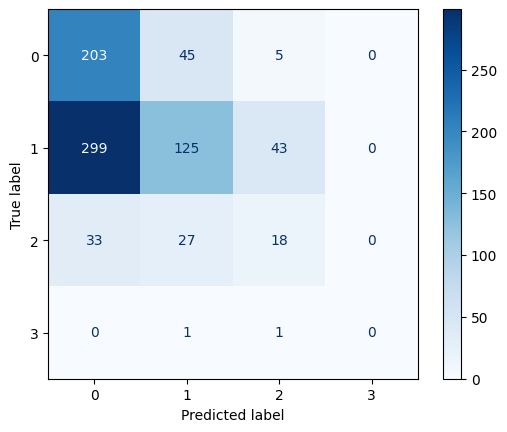

In [347]:
plot_confusion_matrix(adaboost_classi, X_train, y_train, cmap=plt.cm.Blues)
plt.show()

In [348]:
import numpy as np

In [349]:
list_y = y['score_exam_tot'].to_list()
n_classes = len(set(list_y))
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import plot_precision_recall_curve



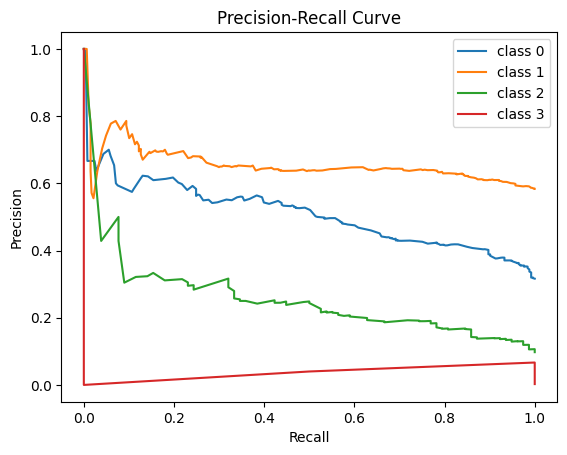

In [352]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_score = logistic_classi.predict_proba(X_train)
precision = dict()
recall = dict()
thresholds = dict()

for i in range(n_classes):
    y_class = (y_train == i).astype(int)
    precision_i, recall_i, thresholds_i = precision_recall_curve(y_class.values.ravel(), y_score[:, i].ravel())
    precision[i] = precision_i
    recall[i] = recall_i
    thresholds[i] = thresholds_i

# Plot the precision-recall curves for all classes on the same plot
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label='class {}'.format(i))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.title('Precision-Recall Curve')
plt.show()

class 3 only has 4 samples which explain why is it so bad